<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Papers/blob/main/VGGNet_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

tf.__version__

'2.11.0'

#Data 
[Source](https://www.kaggle.com/datasets/csafrit2/plant-leaves-for-image-classification)

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive'
!kaggle datasets download -d csafrit2/plant-leaves-for-image-classification
!unzip \*.zip && rm .zip

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory  = '/content/Plants_2/train/',
    label_mode = 'categorical',
    image_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle    = True
)


valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory  = '/content/Plants_2/valid/',
    label_mode = 'categorical',
    image_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle    = True
)


test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory  = '/content/Plants_2/test/',
    label_mode = 'categorical',
    image_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle    = True
)

Found 4274 files belonging to 22 classes.
Found 110 files belonging to 22 classes.
Found 110 files belonging to 22 classes.


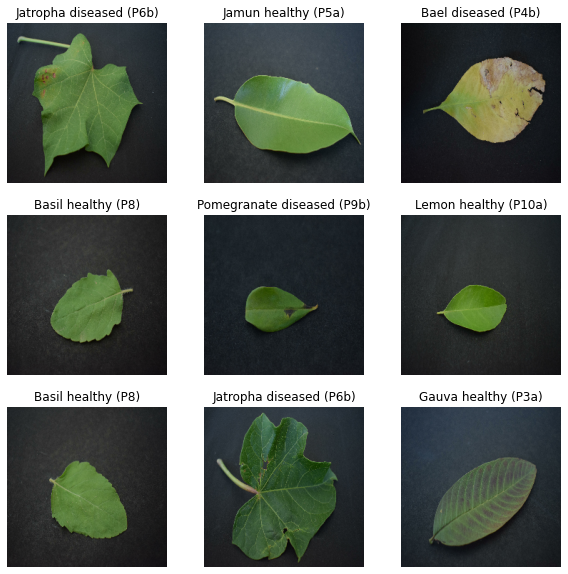

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(test_ds.class_names[np.argmax(labels[i])])
    plt.axis('off')

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2),  

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=4096, activation='relu'),
    tf.keras.layers.Dense(units=4096, activation='relu'),  
    tf.keras.layers.Dense(units=len(train_ds.class_names), activation='softmax'),  

])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(train_ds, batch_size=32, epochs=2, steps_per_epoch=len(train_ds), validation_data=valid_ds, validation_steps=len(valid_ds))

Epoch 1/2
  1/134 [..............................] - ETA: 4:36:56 - loss: 3.0681 - accuracy: 0.0625